## TASK 1- PREDICTING MARKS
### ASSIGNED BY - GRIP ( THE SPARKS FOUNDATION )
### DONE BY - ANUBHAB MANDAL
### ** Using Linear Regression**

In this regression task we will predict the percentage of marks that a student is expected to score based upon the number of hours they studied.

In [1]:
# Importing all libraries required and using matplotlib inline to see graphs within the notebook
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
%matplotlib inline

In [2]:
# Reading data from remote link
url = "http://bit.ly/w-data"
s_data = pd.read_csv(url)
print("Data imported successfully")

s_data.head(5)

Data imported successfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


Let's plot our data points on 2-D graph to eyeball our dataset and see if we can manually find any relationship between the data. We can create the plot with the following script:

<module 'matplotlib.pyplot' from 'C:\\Users\\sTar\\anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

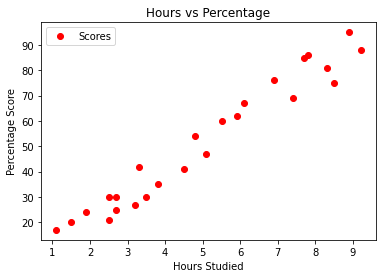

In [3]:
# Plotting the distribution of scores
s_data.plot(x='Hours', y='Scores', style='ro')  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt

**From the above graph, we can clearly see that we can fit a linear regression positive slope graph to get better prediction.**

### **Preparing the data**

1. Splitting data into attributes and labels

In [13]:
X = s_data.iloc[:, :-1].values  
y = s_data.iloc[:, 1].values

2. Splitting this data into training and test sets. We'll do this by using Scikit-Learn's built-in train_test_split() method:

In [16]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                            test_size=0.2, random_state=0) 

### **Training the Algorithm**
1. Using the training sets we have obtained, we can train our algorithm. 

In [17]:
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(X_train, y_train) 

print("Training complete.")

Training complete.


2. Plotting the regression line for the test data.

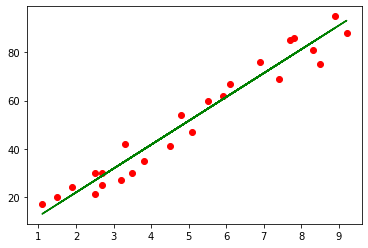

In [27]:
# Plotting the regression line
line = regressor.coef_*X+regressor.intercept_

# Plotting for the test data
plt.scatter(X, y,c='red')
plt.plot(X, line,'g');
plt.show()

### **Making Predictions**
Now that we have trained our algorithm, let's make some predictions and check our algorithm.

In [19]:
type(X_test) # Testing data - In Hours
y_pred = regressor.predict(X_test) # Predicting the scores
y_pred

array([16.88414476, 33.73226078, 75.357018  , 26.79480124, 60.49103328])

In [20]:
# Comparing Actual vs Predicted
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df 

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


### Asking to input any number of hours for prediction

In [21]:
# You can also test with your own data
hours = eval('[['+input()+']]')
own_pred = regressor.predict(hours)
print("No of Hours = "+str(hours[0]))
print("Predicted Score = {}".format(own_pred[0]))

9.25
No of Hours = [9.25]
Predicted Score = 93.69173248737538


### **Evaluating the model**

The final step is to evaluate the performance of algorithm. It is particularly important to compare how well different algorithms perform on a particular dataset. For simplicity here, the mean square error is chosen however others can be chosen as well.

In [22]:
from sklearn import metrics  
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred)) 

Mean Absolute Error: 4.183859899002975
